In [1]:
from sympy import *
from sympy.physics.quantum import TensorProduct
init_session()

IPython console for SymPy 1.8 (Python 3.8.8-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.8/



In [2]:
#constructing generator matrix
q = symbols('q')
n = symbols('n')
#q = 0.1
n = 2
L1 = Matrix([[-1*(q**(2*n-2)-q**(2*n-4)+(2/q**2)+((-q**(1-n)+q**(n-1))**2/q**2)+q**(2*n-2)-q**(2*n-4)+(2/q**2)),
              q**(2*n-2)-q**(2*n-4)+(2/q**2),(-q**(1-n)+q**(n-1))**2/q**2,q**(2*n-2)-q**(2*n-4)+(2/q**2)],
             
             [q**(2*n)-q**(2*n-2)+2,
              -1*(q**(2*n)-q**(2*n-2)+2+q**(-2*n)-q**(2-2*n)+2+(-q**(1-n)+q**(n-1))**2),
              q**(-2*n)-q**(2-2*n)+2,(-q**(1-n)+q**(n-1))**2],
             
            [(q**2)*(-q**(1-n)+q**(n-1))**2,2*q**2+q**(2-2*n)-q**(4-2*n),
             -1*(((q**2)*(-q**(1-n)+q**(n-1))**2)+2*q**2+q**(2-2*n)-q**(4-2*n)+2*q**2+q**(2-2*n)-q**(4-2*n)),
             2*q**2+q**(2-2*n)-q**(4-2*n)],
             
            [q**(2*n)-q**(2*n-2)+2,(-q**(1-n)+q**(n-1))**2,q**(-2*n)-q**(2-2*n)+2,
             -1*(q**(2*n)-q**(2*n-2)+2+(-q**(1-n)+q**(n-1))**2+q**(-2*n)-q**(2-2*n)+2)]
            
            ])

L2 = Matrix([[-1*((q**(1-2*n))+(q**(2*n-1)))/q,((q**(1-2*n))+(q**(2*n-1)))/q],
             [q*(q**(1-2*n)+q**(2*n-1)),-q*(q**(1-2*n)+q**(2*n-1))]])

L2Piece = Matrix.diag(L2,L2)
fullL2 = Matrix.diag(L2Piece,L2Piece)

zeroMatrixPiece = Matrix.diag(Matrix([[0]]),Matrix([[0]]))
fullZeroMatrix = Matrix.diag(zeroMatrixPiece,zeroMatrixPiece)

firstPiece = Matrix.diag(L1,fullL2)

generatorMatrix = Matrix.diag(firstPiece,fullZeroMatrix)

#generatorMatrix


In [3]:
#Lambda and Phi
lambdaMatrix = Matrix([
    [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
    [0,0,0,0,q**2/(q**2+1),1/(q**2+1),0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,q**2/(q**2+1),1/(q**2+1),0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
    [q**4/(1+q**2)**2,q**2/(1+q**2)**2,1/(1+q**2)**2,q**2/(1+q**2)**2,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,0,q**2/(q**2+1),1/(q**2+1),0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,q**2/(q**2+1),1/(q**2+1),0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]
])

phiMatrix = Matrix([
    [0,0,0,0,1,0,0,0,0],
    [0,0,0,0,1,0,0,0,0],
    [0,0,0,0,1,0,0,0,0],
    [0,0,0,0,1,0,0,0,0],
    [0,1,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0],
    [0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,1,0],
    [1,0,0,0,0,0,0,0,0],
    [0,0,0,1,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0],
    [0,0,0,0,0,0,0,0,1],
])

tensorLambda = TensorProduct(lambdaMatrix,lambdaMatrix)
tensorPhi = TensorProduct(phiMatrix,phiMatrix)

In [4]:
#Middle Generator Constructor
generatorList = ['30','21','03','12','10','01','20','02','31','13','32','23','00','11','22','33']
generatorListWord = ['TZ','WO','ZT','OW','OZ','ZO','WZ','ZW','TO','OT','TW','WT','ZZ','OO','WW','TT']

megaGeneratorListNum = string_list = ["String {}".format(i) for i in range(256)]
megaGeneratorList = string_list = ["String {}".format(i) for i in range(256)]

for i in range(16):
    for j in range(16):
        megaGeneratorListNum[16*i+j] = generatorList[i] + generatorList[j]
        megaGeneratorList[16*i+j] = generatorListWord[i] + generatorListWord[j]

megaGeneratorMatrix = zeros(256, 256)

#print(megaGeneratorListNum)

for i in range(256):
    for j in range(256):
        if megaGeneratorList[i][0] == megaGeneratorList[j][0] and megaGeneratorList[i][3] == megaGeneratorList[j][3]:
            megaGeneratorMatrix[i,j] = generatorMatrix[generatorListWord.index(megaGeneratorList[i][1:3]),generatorListWord.index(megaGeneratorList[j][1:3])]
        else:
            megaGeneratorMatrix[i,j] = 0

fusionMatrix = tensorLambda*megaGeneratorMatrix*tensorPhi

simplifyFusionMatrix = fusionMatrix.applyfunc(simplify)

#simplifyFusionMatrix
#simplifyFusionMatrix = fusionMatrix.simplify_full()

In [5]:
#communicating classes extraction
import numpy as np
#making the ordering of the file
fusionList = ['0','1','2','11','3','22','31','32','33']
megaFusionList = string_list = ["String {}".format(i) for i in range(81)]

for i in range(9):
    for j in range(9):
        megaFusionList[9*i+j] = fusionList[i] + '_' + fusionList[j]

#extracting communicating block
communicationList = ['0_1','1_0']
#communicationList = ['1_1','0_11','11_0']
#communicationList = ['3_0','1_2','2_1','0_3']
#communicationList = ['1_3','3_1','0_31','31_0','2_11','11_2']
#communicationList = ['3_3','0_33','33_0','1_32','32_1','2_31','31_2','11_22','22_11']

indexList = []
for item in communicationList:
    indexList.append(megaFusionList.index(item))

communicatingBlock = simplifyFusionMatrix[indexList,indexList]

communicatingBlock = communicatingBlock.T

communicatingEigenVec = communicatingBlock.eigenvects()
#communicatingEigenVec = communicatingBlock.nullspace()

communicatingEigenVec

⎡⎛      ⎡⎡1 ⎤⎤⎞                                        ⎤
⎢⎜      ⎢⎢──⎥⎥⎟  ⎛   8    6      4    2               ⎞⎥
⎢⎜      ⎢⎢ 4⎥⎥⎟  ⎜- q  + q  - 2⋅q  + q  - 1     ⎡⎡-1⎤⎤⎟⎥
⎢⎜0, 1, ⎢⎢q ⎥⎥⎟, ⎜─────────────────────────, 1, ⎢⎢  ⎥⎥⎟⎥
⎢⎜      ⎢⎢  ⎥⎥⎟  ⎜             4                ⎣⎣1 ⎦⎦⎟⎥
⎣⎝      ⎣⎣1 ⎦⎦⎠  ⎝            q                       ⎠⎦

In [6]:
#communicatingEigenVec[0][2][0].applyfunc(simplify)

#communicating classes extraction
import numpy as np
#making the ordering of the file
fusionList = ['0','1','2','11','3','22','31','32','33']
megaFusionList = string_list = ["String {}".format(i) for i in range(81)]

for i in range(9):
    for j in range(9):
        megaFusionList[9*i+j] = fusionList[i] + '_' + fusionList[j]

#extracting communicating block
#communicationList = ['0_1','1_0']
#communicationList = ['1_1','0_11','11_0']
communicationList = ['3_0','1_2','2_1','0_3']
#communicationList = ['1_3','3_1','0_31','31_0','2_11','11_2']
#communicationList = ['3_3','0_33','33_0','1_32','32_1','2_31','31_2','11_22','22_11']

indexList = []
for item in communicationList:
    indexList.append(megaFusionList.index(item))

communicatingBlock = simplifyFusionMatrix[indexList,indexList]

communicatingBlock = communicatingBlock

communicatingBlock = communicatingBlock

communicatingEigenVec = communicatingBlock.eigenvects()
#communicatingEigenVec = communicatingBlock.nullspace()

#communicatingEigenVec
communicatingBlock

⎡                                                                             
⎢     8      6    4      2           6    2 ⎛ 2    ⎞                6    2 ⎛ 2
⎢- 2⋅q  - 2⋅q  + q  - 4⋅q  - 1      q  + q ⋅⎝q  - 1⎠ + 3           q  + q ⋅⎝q 
⎢─────────────────────────────      ────────────────────           ───────────
⎢         8      6    4                            2                          
⎢        q  + 2⋅q  + q                   2 ⎛ 2    ⎞                     2 ⎛ 2 
⎢                                       q ⋅⎝q  + 1⎠                    q ⋅⎝q  
⎢                                                                             
⎢                                                                             
⎢     2 ⎛ 6    4    2    ⎞       ⎛ 12    10      6    2    ⎞             ⎛ 2  
⎢    q ⋅⎝q  + q  - q  + 3⎠      -⎝q   + q   + 4⋅q  + q  + 1⎠             ⎝q  -
⎢    ─────────────────────      ─────────────────────────────            ─────
⎢                  2                     8      6   

In [7]:
matrixList = []
for i in range(len(communicatingEigenVec)):
    for j in range(communicatingEigenVec[i][1]):
        matrixList.append(communicatingEigenVec[i][2][j].transpose().tolist()[0])
eigenVecMatrix = Matrix(matrixList).transpose()
print(latex(eigenVecMatrix*eigenVecMatrix.transpose()))

\left[\begin{matrix}1 + \frac{1}{q^{8}} + \frac{1}{q^{16}} & 1 - \frac{q^{4} - 1}{q^{8}} - \frac{1}{q^{12}} & 1 - \frac{1}{q^{12}} & 1 - \frac{1}{q^{4}} + \frac{1}{q^{8}}\\1 - \frac{q^{4} - 1}{q^{8}} - \frac{1}{q^{12}} & 2 + \frac{\left(q^{4} - 1\right)^{2}}{q^{8}} + \frac{1}{q^{8}} & \frac{1}{q^{8}} & 1 + \frac{q^{4} - 1}{q^{4}} - \frac{1}{q^{4}}\\1 - \frac{1}{q^{12}} & \frac{1}{q^{8}} & 2 + \frac{1}{q^{8}} & 1 - \frac{1}{q^{4}}\\1 - \frac{1}{q^{4}} + \frac{1}{q^{8}} & 1 + \frac{q^{4} - 1}{q^{4}} - \frac{1}{q^{4}} & 1 - \frac{1}{q^{4}} & 3\end{matrix}\right]


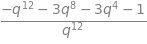

In [8]:
eigenVecMatrix.det()
#print(latex(eigenVecMatrix))

In [9]:
#diagonalNinebyNine = communicatingBlock.diagonalize()
#eigenVecMatrix.det()
numeratorOne = -𝑞**40-5*𝑞**38-20*𝑞**36-55*𝑞**34-130*𝑞**32-251*𝑞**30-430*𝑞**28-635*𝑞**26-845*𝑞**24-990*𝑞**22-1052*𝑞**20-990*𝑞**18-845*𝑞**16-635*𝑞**14
numeratorTwo = -430*𝑞**12-251*𝑞**10-130*𝑞**8-55*𝑞**6-20*𝑞**4-5*𝑞**2-1
numerator = numeratorOne+numeratorTwo
numerator

In [10]:
print(latex(numerator.factor()))

- \left(q^{4} + 1\right)^{5} \left(q^{2} - q + 1\right)^{5} \left(q^{2} + q + 1\right)^{5}


In [11]:
#(diagonalNinebyNine[0]*diagonalNinebyNine[1]*diagonalNinebyNine[0].inv()).applyfunc(simplify)
denominator = 𝑞**34+5*𝑞**32+7*𝑞**30-4*𝑞**28-17*𝑞**26-7*𝑞**24+9*𝑞**22-9*𝑞**18+7*𝑞**16+17*𝑞**14+4*𝑞**12-7*𝑞**10-5*𝑞**8-𝑞**6
denominator

In [12]:
print(latex(denominator.factor()))

q^{6} \left(q - 1\right)^{3} \left(q + 1\right)^{3} \left(q^{2} + 1\right)^{9} \left(q^{4} - q^{2} + 1\right)


In [13]:
generatorList = ['30','21','03','12','10','01','20','02','31','13','32','23','00','11','22','33']

megaGeneratorListNum = string_list = ["String {}".format(i) for i in range(256)]

for i in range(16):
    for j in range(16):
        megaGeneratorListNum[16*i+j] = generatorList[i][0] + generatorList[j] + generatorList[i][1]
#print(latex(megaGeneratorListNum))

In [14]:
fusionList = ['0','1','2','11','3','22','31','32','33']
megaFusionList = string_list = ["String {}".format(i) for i in range(81)]

for i in range(9):
    for j in range(9):
        megaFusionList[9*i+j] = fusionList[i] + "_" + fusionList[j]
#print(latex(megaFusionList))

In [15]:
diagonalOrdering = ['3_3','0_33','33_0','1_32','32_1','2_31','31_2','11_22','22_11',
                    '1_3','3_1','0_31','31_0','2_11','11_2',
                   '2_3','3_2','0_32','32_0','1_22','22_1',
                   '3_31','31_3','1_33','33_1','11_32','32_11',
                   '3_32','32_3','2_33','33_2','22_31','31_22',
                   '3_0','1_2','2_1','0_3',
                   '31_1','11_3','3_11','1_31',
                   '32_2','22_3','3_22','2_32',
                   '33_3','31_32','32_31','3_33',
                   '1_1','0_11','11_0',
                   '2_2','0_22','22_0',
                   '31_31','11_33','33_11',
                   '32_32','22_33','33_22',
                   '0_1','1_0',
                   '0_2','2_0',
                   '1_11','11_1',
                   '2_22','22_2',
                   '11_31','31_11',
                   '22_32','32_22',
                   '31_33','33_31',
                   '32_33','33_32',
                   '0_0',
                   '11_11',
                   '22_22',
                   '33_33']
#diagonalOrdering

In [16]:
#print(latex(diagonalOrdering))